In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import pickle
import re
from pathlib import Path
import scipy.stats as ss
from scipy.optimize import curve_fit
import seaborn as sns
import sys
sys.path.append(os.path.join(Path(os.getcwd()).parents[0], "functions"))
import warnings
warnings.filterwarnings('ignore')
import helper_functions as hfn
from matplotlib import gridspec

In [2]:
from lmfit import Model
from lmfit.models import LinearModel
model_lm = LinearModel()

In [3]:
colors = ['dark grey', 'slate grey','grey', 'warm grey','greyish']
sns.set_style("ticks")
hfont = {'fontname':'Myriad Pro'}

In [4]:
def make_res_inputratio(res_df):
    n = len(res_df.area.unique())
    res_df['new'] = (res_df.index/n+1).astype(int)
    res_df['TotalInputs'] = res_df.groupby('new')['inputs'].transform('sum')
    res_df['area_ratio'] = res_df['inputs']/ res_df['TotalInputs']
    for area in res_df.area.unique():

        this_res_df = res_df[res_df.area == area]
        plt.plot(this_res_df.starters, this_res_df.area_ratio, 'o')
        plt.ylim(0,1)
    return res_df

In [5]:
def make_res_inputratio_noplot(res_df):
    n = len(res_df.area.unique())
    res_df['new'] = (res_df.index/n+1).astype(int)
    res_df['TotalInputs'] = res_df.groupby('new')['inputs'].transform('sum')
    res_df['area_ratio'] = res_df['inputs']/ res_df['TotalInputs']
    return res_df

In [6]:
def make_res_ci_noplot(res_df):
    n = len(res_df.area.unique())
    res_df['area_ci'] = res_df['inputs']/ res_df['starters']
    return res_df

In [7]:
def func(x, a, b, c):
	return a * x**2 + b * x + c

In [8]:
def func3(x, a, b, c, d):
	return a * x**3 + b * x**2 + c * x + d

In [9]:
path = Path(os.getcwd()).parents[0]

prob_path = os.path.join(path, 'data/network_models/probabilistic_model')

datapath = os.path.join(prob_path, 'input_fractions')

datapath_res = os.path.join(datapath, 'results')

datapath_res_p = os.path.join(datapath_res, 'input_ratio_ni_cst')
datapath_res_ni = os.path.join(datapath_res, 'input_ratio_p_cst')
datapath_res_p_ni = os.path.join(datapath_res, 'input_ratio')

figpath = os.path.join(path, 'figures')
hfn.dir_check(figpath)

fig5path = os.path.join(figpath, 'Fig5')
hfn.dir_check(fig5path)

fig5panelpaths = os.path.join(fig5path, 'panels')
hfn.dir_check(fig5panelpaths)

# plot data - p varying

In [10]:
with open(os.path.join(datapath_res_p, 'p_arr.pickle'), 'rb') as fp:
    p_arr = pickle.load(fp)

In [11]:
p_arr_df = pd.DataFrame(p_arr)
p_arr_df['range'] = p_arr_df.max(axis = 1) - p_arr_df.min(axis = 1)
test_ind_p = p_arr_df['range'].argmax()

In [12]:
allfiles_p = [f for f in os.listdir(datapath_res_p) if (os.path.isfile(os.path.join(datapath_res_p, f)) & f.startswith('res'))]

In [13]:
# load file for example plots
thisfile_p = os.path.join(datapath_res_p, 'res_df_' + str(test_ind_p)+'.h5')
thisdf_p = pd.read_hdf(thisfile_p)

In [14]:
thisdf_p = make_res_inputratio_noplot(thisdf_p)

In [15]:
thisdf_p = make_res_ci_noplot(thisdf_p)

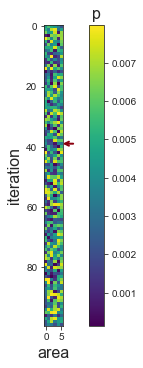

In [16]:
f1= plt.figure(figsize = (5,5), constrained_layout=True)
ax = plt.gca()
im = plt.imshow(p_arr_df, cmap = 'viridis')
plt.ylabel('iteration', fontsize = 16)
plt.xlabel('area', fontsize = 16)
# rect = patches.Rectangle((-1.1, 37), 10.1,1,linewidth=2,edgecolor='r',facecolor='none')
# Add the patch to the Axes
# ax.add_patch(rect)
ax.annotate('', xy=(0.9, 0.605), xycoords='axes fraction', xytext=(1.7,0.605), 
            arrowprops=dict(arrowstyle="->", color='xkcd:crimson',lw=2))
cbar = f1.colorbar(im)
cbar.ax.set_title('p', fontsize = 16)
plt.savefig(os.path.join(fig5panelpaths, 'fig5a.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(fig5panelpaths, 'fig5a.eps'), bbox_inches = 'tight', format = 'eps')

In [17]:
thisdf_p['p']= thisdf_p.apply(lambda row: p_arr_df.iloc[test_ind_p, int(row.area)], axis=1)

In [18]:
thisdf_p = thisdf_p.sort_values(by=['p'])

In [19]:
thisdf_p['area_p'] = thisdf_p.groupby('p').ngroup()+1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


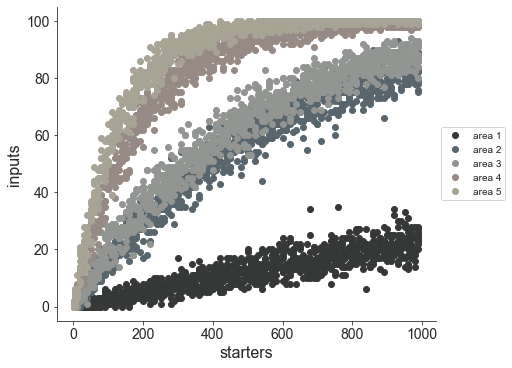

In [20]:
f2 = plt.figure(figsize = (7,5), constrained_layout=True)

for i in range(5):
    this_res_df = thisdf_p[thisdf_p.area_p == i+1]
    plt.plot(this_res_df.starters, this_res_df.inputs, 'o', c = sns.xkcd_palette(colors)[i], label = 'area ' + str(i+1))#+ '\nNi = 100, p = '+ "{:.4f}".format(p_arr_df.iloc[42, i]))
plt.xlabel('starters', fontsize = 16)
plt.ylabel('inputs', fontsize = 16)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(os.path.join(fig5panelpaths, 'fig5b.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(fig5panelpaths, 'fig5b.eps'), bbox_inches = 'tight', format = 'eps')

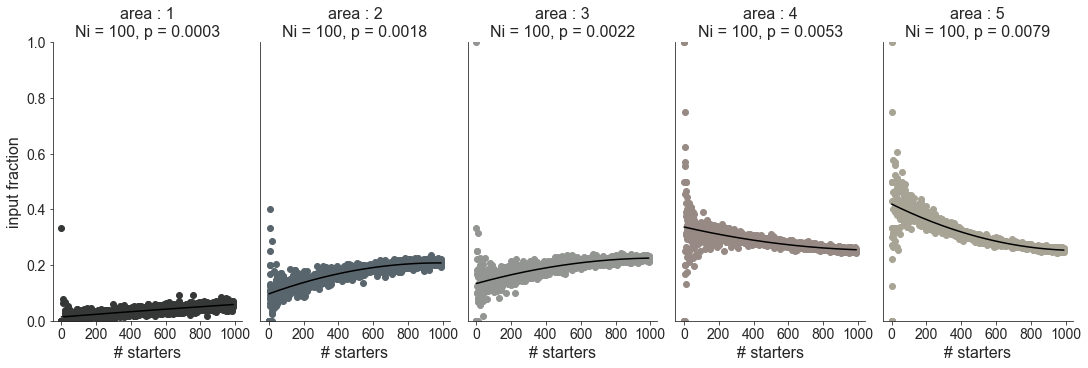

In [23]:
f3 = plt.figure(figsize = (15,5), constrained_layout = True)

gs = f3.add_gridspec(1,5)

ax = {}
for i in range(5):
    ax[i] = f3.add_subplot(gs[:, i:(i)+1])#(1, 5 , i+1)
    this_res_df = thisdf_p[thisdf_p.area_p == i+1].dropna()
    this_res_df = this_res_df.sort_values(by=['starters'])
    thisx = this_res_df.starters
    thisy = this_res_df.area_ratio
    popt, pcov = curve_fit(func, thisx, thisy)
    
    ax[i].plot(this_res_df.starters, this_res_df.area_ratio, 'o', c = sns.xkcd_palette(colors)[i])#'C'+str(i))
    ax[i].plot(thisx, func(thisx, *popt), c = 'k')
    ax[i].set_title('area : ' + str(i+1) + '\nNi = 100, p = '+ "{:.4f}".format(this_res_df.p.unique()[0]), fontsize = 16)
    ax[i].set_ylim(0,1)
    ax[i].set_xlabel('# starters', fontsize = 16)

    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    for label in (ax[i].get_xticklabels() + ax[i].get_yticklabels()):
        label.set_fontsize(14)
        
for i in [1,2,3,4]:
    ax[i].yaxis.set_visible(False)
ax[0].set_ylabel('input fraction', fontsize = 16)
plt.savefig(os.path.join(fig5panelpaths, 'fig5d.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(fig5panelpaths, 'fig5d.eps'), bbox_inches = 'tight', format = 'eps')

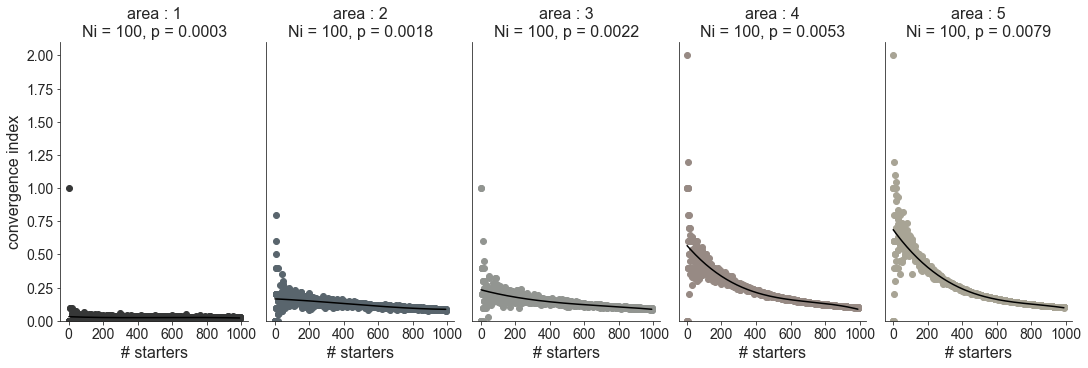

In [24]:
f3b = plt.figure(figsize = (15,5), constrained_layout = True)

gs = f3b.add_gridspec(1,5)

ax = {}
for i in range(5):
    ax[i] = f3b.add_subplot(gs[:, i:(i)+1])#(1, 5 , i+1)
    this_res_df = thisdf_p[thisdf_p.area_p == i+1].dropna()
    this_res_df = this_res_df.sort_values(by=['starters'])
    thisx = this_res_df.starters
    thisy = this_res_df.area_ci
    popt, pcov = curve_fit(func3, thisx, thisy)
    
    ax[i].plot(this_res_df.starters, this_res_df.area_ci, 'o', c = sns.xkcd_palette(colors)[i])#'C'+str(i))
    ax[i].plot(thisx, func3(thisx, *popt), c = 'k')
    ax[i].set_title('area : ' + str(i+1) + '\nNi = 100, p = '+ "{:.4f}".format(this_res_df.p.unique()[0]), fontsize = 16)
    ax[i].set_ylim(0,2.1)
    ax[i].set_xlabel('# starters', fontsize = 16)

    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    for label in (ax[i].get_xticklabels() + ax[i].get_yticklabels()):
        label.set_fontsize(14)
        
for i in [1,2,3,4]:
    ax[i].yaxis.set_visible(False)
ax[0].set_ylabel('convergence index', fontsize = 16)
plt.savefig(os.path.join(fig5panelpaths, 'fig5d2.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(fig5panelpaths, 'fig5d2.eps'), bbox_inches = 'tight', format = 'eps')

In [25]:
this_df_an_p = []
for file in allfiles_p:
    thisind = re.search(r'\d+', file).group()
    thisfile = os.path.join(datapath_res_p, file)
    thisdf = pd.read_hdf(thisfile)
    thisdf = make_res_inputratio_noplot(thisdf)
    for area in range(5):

        dfarea = thisdf[thisdf.area == area].dropna()
        # fit polynomial
        thisx = dfarea.starters
        thisy = dfarea.area_ratio
        popt, pcov = curve_fit(func, thisx, thisy)
        dfarea['fit'] = func(thisx, *popt)
        dfarealow = dfarea[dfarea.starters <= 100].dropna()
        dfareahigh = dfarea[dfarea.starters >= 900].dropna()
        xlow = dfarealow.starters
        ylow = dfarealow.area_ratio

        xhigh = dfareahigh.starters
        yhigh = dfareahigh.area_ratio

        pars_low = model_lm.guess(ylow, x = xlow)
        results_low = model_lm.fit(ylow, pars_low, x = xlow)

        pars_high = model_lm.guess(yhigh, x = xhigh)
        results_high = model_lm.fit(yhigh, pars_high, x = xhigh)
        this_df_an_p.append({'ind': thisind, 'area' : area,  'ratio_low' : dfarealow.area_ratio.mean(), 'ratio_high' : dfareahigh.area_ratio.mean(), 'ratio_fit_low' : dfarealow.fit.mean(), 'ratio_fit_high' : dfareahigh.fit.mean(), 'slope_low' : results_low.params['slope'].value, 'slope_high' : results_high.params['slope'].value})
an_df_p = pd.DataFrame(this_df_an_p)

In [26]:
an_df_p['ratio_fit_diff'] = an_df_p['ratio_fit_high'] - an_df_p['ratio_fit_low']
an_df_p['ratio_fit_ratio'] = an_df_p['ratio_fit_high'] / an_df_p['ratio_fit_low']

In [27]:
an_toplot_p = an_df_p[['ind','area','ratio_fit_low']]
an_toplot_p.columns = ['ind','area','ratio_fit']
an_toplot_p['starters'] = 'low'

an_toplot2_p = an_df_p[['ind','area','ratio_fit_high']]
an_toplot2_p.columns = ['ind','area','ratio_fit']
an_toplot2_p['starters'] = 'high'

an_toplot_p = pd.concat([an_toplot_p, an_toplot2_p], axis =0)

In [28]:
this_an_df_p = an_df_p[an_df_p.ind == str(test_ind_p)]

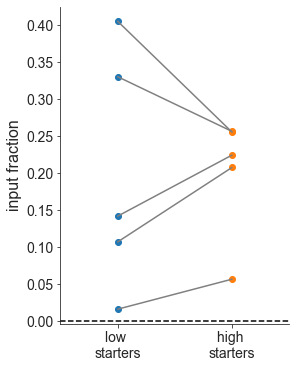

In [29]:
f4= plt.figure(figsize = (4,5), constrained_layout=True)
plt.scatter(np.ones(5), this_an_df_p.ratio_fit_low, label = 'low starters')
plt.scatter(np.ones(5)*1.5, this_an_df_p.ratio_fit_high, label = 'high starters')
plt.plot([np.ones(5),np.ones(5)*1.5], [this_an_df_p.ratio_fit_low,this_an_df_p.ratio_fit_high], 'gray')
plt.axhline(0, c = 'k', ls = '--')

plt.xlim(0.75, 1.75)
plt.xticks([])

text_values = ["low \nstarters", "high \nstarters"]
x_values = [1, 1.5]
plt.xticks(x_values, text_values)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.ylabel('input fraction', fontsize = 16)
plt.savefig(os.path.join(fig5panelpaths, 'fig5c.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(fig5panelpaths, 'fig5c.eps'), bbox_inches = 'tight', format = 'eps')

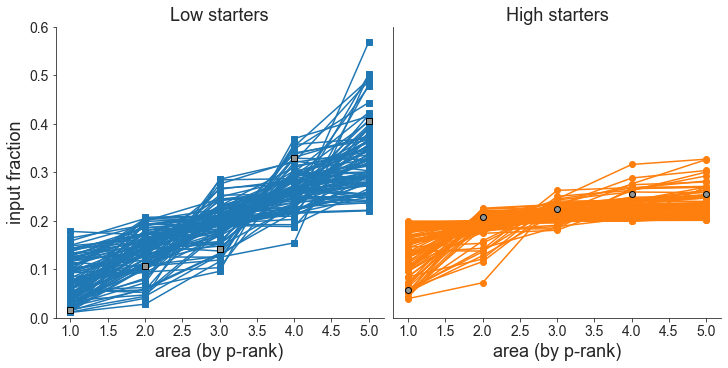

In [30]:
f5 = plt.figure(figsize = (10,5), constrained_layout = True)

gs = f5.add_gridspec(1,4)


ax1 = f5.add_subplot(gs[:, 0:2])
ax2 = f5.add_subplot(gs[:, 2:])
for ind in range(100):
    if ind == test_ind_p:
        col0 = 'xkcd:grey'
        col1 = 'xkcd:grey'
        z = 1
        alph =1
        ls0 = 's'
        ls1 = 'o'
        mec0 = 'k'
        mec1 = 'k'
#         mew = 1
    else:
        col0 = 'C0'
        col1 = 'C1'
        mec0 = 'C0'
        mec1 = 'C1'
        z = -1
        alph = 1
        ls0 ='s-'
        ls1 = 'o-'
    this_an_df = an_df_p[an_df_p.ind == str(ind)]
    this_an_df['p'] = this_an_df.apply(lambda row : p_arr_df.iloc[int(row.ind), int(row.area)], axis=1)
    this_an_df = this_an_df.sort_values(by = ['p'])
    ax1.plot(np.arange(5)+1,this_an_df.ratio_fit_low, ls0, c = col0, alpha = alph, zorder = z, mec = mec0)#'C'+str(ind))
    ax2.plot(np.arange(5)+1,this_an_df.ratio_fit_high, ls1, c = col1, alpha = alph, zorder = z, mec = mec1)# 'C'+str(ind))

ax1.set_ylim(0, 0.6)
ax2.set_ylim(0, 0.6)
ax2.yaxis.set_visible(False)
ax1.set_ylabel('input fraction', fontsize = 18)
ax1.set_xlabel('area (by p-rank)', fontsize = 18)
ax2.set_xlabel('area (by p-rank)', fontsize = 18)

ax1.set_title('Low starters', fontsize = 18)
ax2.set_title('High starters', fontsize = 18)


ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

for label in (ax1.get_xticklabels() + ax1.get_yticklabels() + ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(14)

plt.savefig(os.path.join(fig5panelpaths, 'fig5e.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(fig5panelpaths, 'fig5e.eps'), bbox_inches = 'tight', format = 'eps')


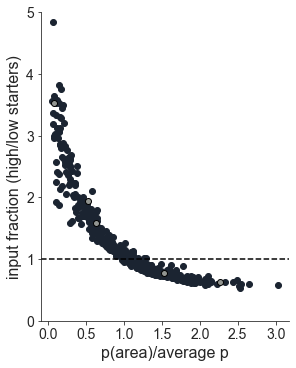

In [31]:
f6 = plt.figure(figsize = (4,5), constrained_layout = True)
for ind in range(99):
    this_an_df = an_df_p[an_df_p.ind == str(ind)]
    if ind == test_ind_p:
        col = 'xkcd:grey'
        mec = 'k'
        z = 1
    else:
        col = 'xkcd:dark'
        mec = 'xkcd:dark'
        z = -1
    plt.plot(p_arr_df.iloc[ind, 0:5]/p_arr_df.iloc[ind, 0:5].mean(),this_an_df.ratio_fit_ratio, 'o', c = col, zorder = z, mec = mec)

plt.axhline(1, ls = '--', c = 'k')
plt.xlabel('p(area)/average p', fontsize = 16)
plt.ylabel('input fraction (high/low starters)', fontsize = 16)
plt.ylim(0,5)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.savefig(os.path.join(fig5panelpaths, 'fig5f.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(fig5panelpaths, 'fig5f.eps'), bbox_inches = 'tight', format = 'eps')